# How Much of the World Has Access to the Internet?

## 📖 Background
You work for a policy consulting firm. One of the firm's principals is preparing to give a presentation on the state of internet access in the world. She needs your help answering some questions about internet accessibility across the world.

## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the top 5 countries with the highest internet use (by population share)?
2. How many people had internet access in those countries in 2019?
3. What are the top 5 countries with the highest internet use for each of the following regions:  'Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'Europe & Central Asia'?
4. Create a visualization for those five regions' internet usage over time.
5. What are the 5 countries with the most internet users?
6. What is the correlation between internet usage (population share) and broadband subscriptions for 2019?
7. Summarize your findings.

_Note:  [This](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups) is how the World Bank defines the different regions._

## 💾 The data

#### The research team compiled the following tables ([source](https://ourworldindata.org/internet)):

#### internet
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2019.
- "Internet_usage" -  The share of the entity's population who have used the internet in the last three months.

#### people
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2020.
- "Users" - The number of people who have used the internet in the last three months for that country, region, or group.

#### broadband
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1998 to 2020.
- "Broadband_Subscriptions" - The number of fixed subscriptions to high-speed internet at downstream speeds >= 256 kbit/s for that country, region, or group.

_**Acknowledgments**: Max Roser, Hannah Ritchie, and Esteban Ortiz-Ospina (2015) - "Internet." OurWorldInData.org._

In [20]:
# Import pandas
import pandas as pd

# Read the data
broadband = pd.read_csv('data/broadband.csv')

# Take a look at the first rows
broadband

,Entity,Code,Year,Broadband_Subscriptions
0,Afghanistan,AFG,2004,0.000809
1,Afghanistan,AFG,2005,0.000858
2,Afghanistan,AFG,2006,0.001892
3,Afghanistan,AFG,2007,0.001845
4,Afghanistan,AFG,2008,0.001804
...,...,...,...,...
3883,Zimbabwe,ZWE,2016,1.217633
3884,Zimbabwe,ZWE,2017,1.315694
3885,Zimbabwe,ZWE,2018,1.406322
3886,Zimbabwe,ZWE,2019,1.395818


In [21]:
# Read the internet table
internet = pd.read_csv('data/internet.csv')

# Take a look at the first rows
internet

,Entity,Code,Year,Internet_Usage
0,Afghanistan,AFG,1990,0.000000
1,Afghanistan,AFG,1991,0.000000
2,Afghanistan,AFG,1992,0.000000
3,Afghanistan,AFG,1993,0.000000
4,Afghanistan,AFG,1994,0.000000
...,...,...,...,...
7084,Zimbabwe,ZWE,2013,15.500000
7085,Zimbabwe,ZWE,2014,16.364740
7086,Zimbabwe,ZWE,2015,22.742818
7087,Zimbabwe,ZWE,2016,23.119989


In [22]:
# Read the people table
people = pd.read_csv('data/people.csv')
people

,Entity,Code,Year,Users
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0
2,Afghanistan,AFG,1992,0
3,Afghanistan,AFG,1993,0
4,Afghanistan,AFG,1994,0
...,...,...,...,...
6374,Zimbabwe,ZWE,2016,3341464
6375,Zimbabwe,ZWE,2017,3599269
6376,Zimbabwe,ZWE,2018,3763048
6377,Zimbabwe,ZWE,2019,3854006


## 1. What are the top 5 countries with the highest internet use (by population share)?

In [23]:
import pandas as pd

broadband = pd.read_csv('data/broadband.csv')
internet = pd.read_csv('data/internet.csv')
people = pd.read_csv('data/people.csv')

top_internet_usage = internet[['Entity', 'Year', 'Internet_Usage']].sort_values('Internet_Usage', ascending=False)
top_internet_usage_country = top_internet_usage.dropna()

top_internet_usage_country.head()

,Entity,Year,Internet_Usage
470,Bahrain,2019,99.701504
5387,Qatar,2018,99.652849
5388,Qatar,2019,99.652804
3415,Kuwait,2018,99.598850
3767,Liechtenstein,2017,99.546612


Above, we can see all years for all countries (non-country entities have been excluded). Qatar appears in the top 5 of the list twice - it may have consistently high internet usage. This time, lets make sure it's comparable by only including the most recent year in the chart.

In [24]:
top_internet_usage_country_2019 = top_internet_usage_country[top_internet_usage_country['Year']==2019]
top_internet_usage_country_2019.head()

,Entity,Year,Internet_Usage
470,Bahrain,2019,99.701504
5388,Qatar,2019,99.652804
3416,Kuwait,2019,99.542676
6716,United Arab Emirates,2019,99.149998
1552,Denmark,2019,98.046435


Middle Eastern countries (including Qatar) hold the top 4 spots. However, now we can see Denmark making fifth place, even though it is a full percentage point behind UAE.

## 2. How many people had internet access in those countries in 2019?

In [62]:
num_ppl_access = pd.merge(top_internet_usage_country_2019, people)
num_ppl_access

,Entity,Year,Internet_Usage,Code,Users
0,Bahrain,2019,99.701504,BHR,1489735
1,Qatar,2019,99.652804,QAT,2797495
2,Kuwait,2019,99.542676,KWT,4420795
3,United Arab Emirates,2019,99.149998,ARE,9133361
4,Denmark,2019,98.046435,DNK,5682653
...,...,...,...,...,...
63,Egypt,2019,57.282869,EGY,60501404
64,Mongolia,2019,51.079994,MNG,1651128
65,Indonesia,2019,47.690649,IDN,128565820
66,Kenya,2019,22.565119,KEN,11497256


In [26]:
# This is a chart, switch to the DataCamp editor to view and configure it.

,Entity,Year,Internet_Usage,Code,Users
0,Bahrain,2019,99.701504,BHR,1489735
1,Qatar,2019,99.652804,QAT,2797495
2,Kuwait,2019,99.542676,KWT,4420795
3,United Arab Emirates,2019,99.149998,ARE,9133361
4,Denmark,2019,98.046435,DNK,5682653
5,Norway,2019,98.000004,NOR,5241320
6,South Korea,2019,96.157583,KOR,49813310
7,Saudi Arabia,2019,95.724736,SAU,34295651
8,Brunei,2019,95.000000,BRN,416155
9,Sweden,2019,94.493443,SWE,9702513


Wow, our original Middle Eastern quad may be the top by percentage, but they certainly don't have the biggest number of users. South Korea and Saudi Arabia blow the others in the top 10 away for number of users in 2019. If we only looked at the top 5 countries, we would not have even seen this.

## 3. What are the top 5 countries with the highest internet use for each of the following regions:  'Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'Europe & Central Asia'?

### East Asia & Pacific

In [27]:
eap = ['American Samoa', 'Korea, Rep.', 'Philippines', 'Australia',	'Lao PDR', 'Samoa', 'Brunei Darussalam', 'Macao SAR, China', 'Singapore', 'Cambodia', 'Malaysia', 'Solomon Islands', 'China', 'Marshall Islands', 'Taiwan, China', 'Fiji', 'Micronesia, Fed. Sts.',	'Thailand', 'French Polynesia',	'Mongolia',	'Timor-Leste', 'Guam', 'Myanmar', 'Papua New Guinea', 'Hong Kong SAR, China', 'Nauru', 'Tonga', 'Indonesia', 'New Caledonia', 'Tuvalu', 'Japan', 'New Zealand',	'Vanuatu', 'Kiribati',	'Northern Mariana Islands', 'Vietnam', "Korea, Dem. People's Rep.",	'Palau']

avgpercuse = top_internet_usage.groupby('Entity')['Internet_Usage'].mean()

avgpercuse = pd.DataFrame(avgpercuse)
avgpercuse = avgpercuse.rename(columns={'Internet_Usage': 'Avg Percent Use', 'Entity':'Entity'})
avgpercuse = avgpercuse.reset_index()

top_internet_usage = top_internet_usage.loc[:,:'Internet_Usage']

use_eap = avgpercuse['Entity'].isin(eap)
top_use_eap = avgpercuse[use_eap].sort_values(by='Avg Percent Use', ascending=False)
top_use_eap.head()

,Entity,Avg Percent Use
171,New Zealand,50.699451
118,Japan,49.030426
13,Australia,48.202448
212,Singapore,47.946487
146,Malaysia,38.234271


To look at the data differently, this time we averaged the percent Internet usage for each country across all years. However, we can also look at the year 2019 again.

In [28]:
top_use_eap2019 = top_internet_usage_country_2019['Entity'].isin(eap)
top_internet_usage_country_2019[top_use_eap2019].head()

,Entity,Year,Internet_Usage
5790,Singapore,2019,88.949253
4024,Malaysia,2019,84.213224
6976,Vietnam,2019,68.700000
6414,Thailand,2019,66.652413
4444,Mongolia,2019,51.079994


Here is where I found it very odd that some of the bigger, developed countries such as Australia and China were not in this list. When I expanded to show the whole chart and not just the head, I found that many countries were missing! Why is that?

In [29]:
top_internet_usage_country[top_internet_usage_country['Entity'] == 'Australia'].head()

,Entity,Year,Internet_Usage
355,Australia,2017,86.545049
354,Australia,2016,86.540000
353,Australia,2015,84.560515
352,Australia,2014,84.000000
351,Australia,2013,83.453497


In [30]:
top_internet_usage_country[top_internet_usage_country['Entity'] == 'China'].head()

,Entity,Year,Internet_Usage
1229,China,2017,54.3
1228,China,2016,53.2
1227,China,2015,50.3
1226,China,2014,47.9
1225,China,2013,45.8


It looks like for many countries, data was not gathered for the last several years. Maybe we should go back a few years to get a more accurate picture of the data with more countries.

In [31]:
top_internet_usage_country_2015 = top_internet_usage_country[top_internet_usage_country['Year']==2015]

top_use_eap2015 = top_internet_usage_country_2015['Entity'].isin(eap)
top_internet_usage_country_2015[top_use_eap2015].head()

,Entity,Year,Internet_Usage
3268,Japan,2015,91.058028
4690,New Zealand,2015,88.222889
353,Australia,2015,84.560515
5786,Singapore,2015,79.012957
4663,New Caledonia,2015,74.001753


That looks much more representative of the region! It is also the same as the overall top 5, except for Malaysia being switched with New Caledonia.

However, this make us wonder how accurate our answer is for question #2.

### Middle East & North Africa

In [32]:
mena = ['Algeria', 'Jordan', 'Qatar', 'Bahrain', 'Kuwait', 'Saudi Arabia', 'Djibouti', 'Lebanon', 'Syrian Arab Republic', 'Egypt, Arab Rep.', 'Libya', 'Tunisia', 'Iran, Islamic Rep.', 'Malta', 'United Arab Emirates', 'Iraq', 'Morocco', 'West Bank and Gaza', 'Israel', 'Oman', 'Yemen, Rep.']

use_mena = avgpercuse['Entity'].isin(mena)
top_use_mena = avgpercuse[use_mena].sort_values(by='Avg Percent Use', ascending=False)
top_use_mena.head()




,Entity,Avg Percent Use
247,United Arab Emirates,44.212255
17,Bahrain,38.888148
197,Qatar,37.663352
149,Malta,37.563549
115,Israel,37.216554


From 1990 to 2019, UAE tops the chart for average percent use by its population in the Middle East and North Africa region.

We can also look at just 2015 again, though (not 2019, now that we know it is missing data!). The top 5 for overall use are the same as the top 5 for 2015.

In [33]:
top_use_mena2015 = top_internet_usage_country_2015['Entity'].isin(mena)
top_internet_usage_country_2015[top_use_mena2015].head()

,Entity,Year,Internet_Usage
466,Bahrain,2015,93.478301
5384,Qatar,2015,92.884826
6712,United Arab Emirates,2015,90.500000
3181,Israel,2015,77.352090
4106,Malta,2015,75.960019


### Latin America & Caribbean

In [34]:
latam = ['Antigua and Barbuda', 'Curacao', 'Paraguay', 'Argentina', 'Dominica', 'Peru', 'Aruba', 'Dominican Republic', 'Puerto Rico', 'Bahamas, The', 'Ecuador', 'Sint Maarten (Dutch part)', 'Barbados', 'El Salvador', 'St. Kitts and Nevis', 'Belize', 'Grenada', 'St. Lucia', 'Bolivia', 'Guatemala', 'St. Martin (French part)', 'Brazil', 'Guyana', 'St. Vincent and the Grenadines', 'British Virgin Islands', 'Haiti', 'Suriname', 'Cayman Islands', 'Honduras', 'Trinidad and Tobago', 'Chile', 'Jamaica', 'Turks and Caicos Islands', 'Colombia', 'Mexico', 'Uruguay', 'Costa Rica', 'Nicaragua', 'Venezuela, RB', 'Cuba', 'Panama', 'Virgin Islands (U.S.)']

# I have been converting the tables from the World Bank to text, not typing all of this in. :)

use_latam = avgpercuse['Entity'].isin(latam)
top_use_latam = avgpercuse[use_latam].sort_values(by='Avg Percent Use', ascending=False)
top_use_latam.head()


,Entity,Avg Percent Use
53,Curacao,64.991363
40,Cayman Islands,44.827210
19,Barbados,36.358693
12,Aruba,36.298887
252,Uruguay,29.241528


In [35]:
top_use_latam2015 = top_internet_usage_country_2015['Entity'].isin(latam)
top_internet_usage_country_2015[top_use_latam2015].head()

,Entity,Year,Internet_Usage
328,Aruba,2015,88.661227
1086,Cayman Islands,2015,77.000000
1199,Chile,2015,76.629592
522,Barbados,2015,76.110000
217,Antigua and Barbuda,2015,70.000000


### South Asia

In [36]:
sasia = ['Afghanistan', 'India', 'Pakistan', 'Bangladesh', 'Maldives', 'Sri Lanka', 'Bhutan', 'Nepal']

use_sasia = avgpercuse['Entity'].isin(sasia)
top_use_sasia = avgpercuse[use_sasia].sort_values(by='Avg Percent Use', ascending=False)
top_use_sasia.head()

,Entity,Avg Percent Use
147,Maldives,17.062356
25,Bhutan,8.939621
224,Sri Lanka,6.594811
110,India,5.815671
184,Pakistan,5.706616


In [37]:
top_use_sasia2015 = top_internet_usage_country_2015['Entity'].isin(sasia)
top_internet_usage_country_2015[top_use_sasia2015].head()

,Entity,Year,Internet_Usage
4050,Maldives,2015,54.461955
686,Bhutan,2015,39.800000
4605,Nepal,2015,17.581618
3042,India,2015,17.000000
495,Bangladesh,2015,14.400000


Much lower percentages of internet usage by population in this region.

### North America

In [38]:
namer = ['Bermuda', 'Canada', 'United States']

use_namer = avgpercuse['Entity'].isin(namer)
top_use_namer = avgpercuse[use_namer].sort_values(by='Avg Percent Use', ascending=False)
top_use_namer

,Entity,Avg Percent Use
24,Bermuda,53.756125
37,Canada,52.252901
249,United States,50.162525


In [39]:
top_use_namer2015 = top_internet_usage_country_2015['Entity'].isin(namer)
top_internet_usage_country_2015[top_use_namer2015]

,Entity,Year,Internet_Usage
661,Bermuda,2015,98.323610
1012,Canada,2015,90.000000
6772,United States,2015,74.554202


The overall percentages for the three countries in North America are pretty close together - why is the United States suddenly much lower in 2015? I hypothesize that this is partly because the United States had an earlier adoption of internet which brough their overall average up. However, I'm still suprised to see that 74% for the US.

### Europe and Central Asia

In [40]:
eca = ['Albania', 'Gibraltar', 'Norway', 'Andorra', 'Greece', 'Poland', 'Armenia', 'Greenland', 'Portugal', 'Austria', 'Hungary', 'Romania', 'Azerbaijan', 'Iceland', 'Russian Federation', 'Belarus', 'Ireland', 'San Marino', 'Belgium', 'Isle of Man', 'Serbia', 'Bosnia and Herzegovina', 'Italy', 'Slovak Republic', 'Bulgaria', 'Kazakhstan', 'Slovenia', 'Channel Islands', 'Kosovo', 'Spain', 'Croatia', 'Kyrgyz Republic', 'Sweden', 'Cyprus', 'Latvia', 'Switzerland', 'Czech Republic', 'Liechtenstein', 'Tajikistan', 'Denmark', 'Lithuania', 'Türkiye', 'Estonia', 'Luxembourg', 'Turkmenistan', 'Faroe Islands', 'Moldova', 'Ukraine', 'Finland', 'Monaco', 'United Kingdom', 'France', 'Montenegro', 'Uzbekistan', 'Georgia', 'Netherlands', 'Germany', 'North Macedonia']

use_eca = avgpercuse['Entity'].isin(eca)
top_use_eca = avgpercuse[use_eca].sort_values(by='Avg Percent Use', ascending=False)
top_use_eca.head()

,Entity,Avg Percent Use
123,Kosovo,86.668314
109,Iceland,62.293549
179,Norway,61.851339
230,Sweden,59.268944
57,Denmark,58.460243


Weird how Kosovo's overall percentage is so much higher than the other countries. Let's check that out.

In [41]:
internet[internet['Entity'] == 'Kosovo']

,Entity,Code,Year,Internet_Usage
3385,Kosovo,OWID_KOS,2017,83.893597
3386,Kosovo,OWID_KOS,2018,89.443032


Data was only collected on Kosovo for two years! That means they don't have as many 0% or other lower percentages factoring into their average as the other countries. We can fairly safely knock Kosovo out of the top overall spot when looking at these numbers compared to the others in the region.

In [42]:
top_use_eca2015 = top_internet_usage_country_2015['Entity'].isin(eca)
top_internet_usage_country_2015[top_use_eca2015].head()

,Entity,Year,Internet_Usage
3013,Iceland,2015,98.200000
164,Andorra,2015,96.910000
4887,Norway,2015,96.810326
3765,Liechtenstein,2015,96.641195
3907,Luxembourg,2015,96.376714


## 4. Create a visualization for those five (six?) regions' internet usage over time.

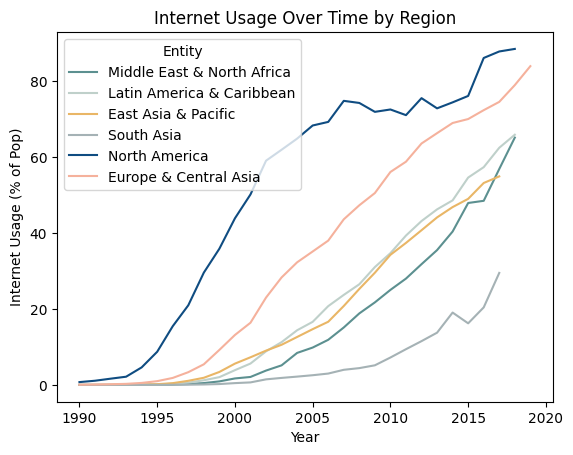

In [43]:
mena_over_time = internet[internet['Entity'] == 'Middle East & North Africa']
latam_over_time = internet[internet['Entity'] == 'Latin America & Caribbean']
eap_over_time = internet[internet['Entity'] == 'East Asia & Pacific']
sasia_over_time = internet[internet['Entity'] == 'South Asia']
namer_over_time = internet[internet['Entity'] == 'North America']
eca_over_time = internet[internet['Entity'] == 'Europe & Central Asia']

import seaborn as sns
import matplotlib.pyplot as plt

entity_colors = {'Middle East & North Africa':'#5C9090',
                'Latin America & Caribbean':'#BFD0CA',
                'East Asia & Pacific':'#E9B666',
                'South Asia':'#A5B2B5',
                'North America':'#0F4C81',
                'Europe & Central Asia':'#F5B19C'}

sns.lineplot(data=mena_over_time, x='Year', y='Internet_Usage', hue='Entity', palette=entity_colors)
sns.lineplot(data=latam_over_time, x='Year', y='Internet_Usage', hue='Entity', palette=entity_colors)
sns.lineplot(data=eap_over_time, x='Year', y='Internet_Usage', hue='Entity', palette=entity_colors)
sns.lineplot(data=sasia_over_time, x='Year', y='Internet_Usage', hue='Entity', palette=entity_colors)
sns.lineplot(data=namer_over_time, x='Year', y='Internet_Usage', hue='Entity', palette=entity_colors)
sns.lineplot(data=eca_over_time, x='Year', y='Internet_Usage', hue='Entity', palette=entity_colors)

import numpy as np

plt.title('Internet Usage Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Internet Usage (% of Pop)')
plt.yticks(np.arange(0, 100, 20))
plt.show()

North America and Europe have consistently led top internet usage, with South Asia consistently coming in last.

## 5. What are the 5 countries with the most internet users?

Knowing that much data is missing for 2019 (and even 2018), let's use 2015 again to figure this out.

In [44]:
most_int_users = pd.merge(top_internet_usage_country_2015, people)
top_int_users = most_int_users.sort_values('Users', ascending=False).dropna()
top_int_users_notworld = top_int_users[1:]
top_int_users_notworld['Users in Millions'] = (top_int_users_notworld['Users'] / 1000000).round(2)
top_int_users_notworld[['Entity', 'Year', 'Users in Millions']].head()

,Entity,Year,Users in Millions
99,China,2015,701.04
45,United States,2015,242.01
163,India,2015,197.11
82,Brazil,2015,119.68
13,Japan,2015,115.87


## 6. What is the correlation between internet usage (population share) and broadband subscriptions for 2019?

In [45]:
# Correlation coefficient between internet usage and broadband subscription percentages

internet2019 = internet['Year'] == 2019
internet2019df = internet[internet2019]
broadband2019 = broadband['Year'] == 2019
broadband2019df = broadband[broadband2019]

int_and_bb_2019 = pd.merge(internet2019df, broadband2019df)

int_and_bb_2019['Internet_Usage'].corr(int_and_bb_2019['Broadband_Subscriptions'])

0.5590077105170114

Overall correlation between internet use and broadband subscription is fairly weak based on this number. Let's plot a scatterplot comparing the two below.

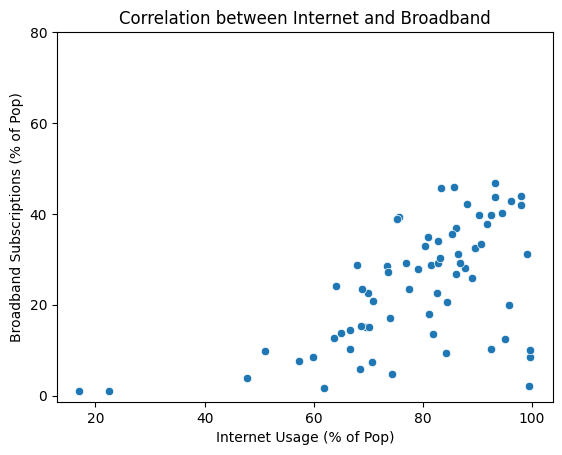

In [46]:
sns.scatterplot(data=int_and_bb_2019, x='Internet_Usage', y='Broadband_Subscriptions')
plt.title('Correlation between Internet and Broadband')
plt.xlabel('Internet Usage (% of Pop)')
plt.ylabel('Broadband Subscriptions (% of Pop)')
plt.yticks(np.arange(0,100,20))
plt.show()

There does seem to be an overall positive correlation, if it weren't for the two countries with very low levels of both types of access. What would happen if we removed those outliers from our data?

In [61]:
# Correlation coefficient between internet usage and broadband subscription percentages, EXCLUDING two lowest use countries

ordered = int_and_bb_2019.sort_values('Internet_Usage', ascending=True)
sliced = ordered[2:]

int_and_bb_2019_cln = sliced
int_and_bb_2019_cln['Internet_Usage'].corr(int_and_bb_2019_cln['Broadband_Subscriptions'])


0.4977851014482495

Ah, even less. This is likely due to several countries with very high Internet access and almost no broadband subscriptions. After all, why use something becoming oudated?

## Looking at some other data

In [56]:
# Highest number of Internet users in 2018

num_ppl_access_total = pd.merge(top_internet_usage_country, people)
npa18 = num_ppl_access_total['Year'] == 2018
num_ppl_access_2018 = num_ppl_access_total[npa18].sort_values('Users', ascending=False).dropna()
num_ppl_access_2018.head()

,Entity,Year,Internet_Usage,Code,Users
166,United States,2018,88.498903,USA,293940279
596,Brazil,2018,70.434283,BRA,148029327
326,Russia,2018,80.864722,RUS,117781320
115,Japan,2018,91.281608,JPN,115246358
1408,Indonesia,2018,39.904639,IDN,106572065


In [60]:
# Highest number of Internet users in 2017

num_ppl_access_total = pd.merge(top_internet_usage_country, people)
npa17 = num_ppl_access_total['Year'] == 2017
num_ppl_access_2017 = num_ppl_access_total[npa17].sort_values('Users', ascending=False).dropna()
num_ppl_access_2017[1:].head()

,Entity,Year,Internet_Usage,Code,Users
1037,China,2017,54.300000,CHN,765779840
194,United States,2017,87.274889,USA,287824925
1639,India,2017,32.000000,IND,246463630
699,Brazil,2017,67.471285,BRA,140680972
106,Japan,2017,91.726547,JPN,116183105


The highest number of users in 2017 or 2018 is much different than 2019 - since we are not missing so many countries' data. These countries make sense as they are the most populated countries in the world.

Let's look at percent access next.

In [67]:
top_internet_usage_country_2018 = top_internet_usage_country[top_internet_usage_country['Year']==2018]
top_internet_usage_country_2018.sort_values('Internet_Usage', ascending=False)

,Entity,Year,Internet_Usage
5387,Qatar,2018,99.652849
3415,Kuwait,2018,99.598850
3016,Iceland,2018,99.010954
469,Bahrain,2018,98.644673
6715,United Arab Emirates,2018,98.450002
...,...,...,...
716,Bolivia,2018,44.286142
959,Cambodia,2018,40.545986
3073,Indonesia,2018,39.904639
2706,Haiti,2018,32.473627


In [66]:
top_internet_usage_country_2017 = top_internet_usage_country[top_internet_usage_country['Year']==2017]
top_internet_usage_country_2017.sort_values('Internet_Usage', ascending=False)

,Entity,Year,Internet_Usage
3767,Liechtenstein,2017,99.546612
663,Bermuda,2017,98.370000
3015,Iceland,2017,98.255201
3414,Kuwait,2017,97.999989
2148,Faeroe Islands,2017,97.581959
...,...,...,...
1173,Chad,2017,6.499998
1116,Central African Republic,2017,4.339255
2655,Guinea-Bissau,2017,3.930509
5933,Somalia,2017,2.004049


Qatar and Kuwait end up in the top 10 list both years, but our top user countries (US, China, Brazil, India, Japan) are still nowhere to be found.

In [78]:
#Seeing which countries have very few entries

entries_per_entity = internet['Entity'].value_counts(ascending=True)
entries_per_entity[:10]

Curacao                      2
Kosovo                       2
South Sudan                  5
American Samoa               6
Northern Mariana Islands     6
Turks and Caicos Islands     6
Nauru                        9
Palau                        9
British Virgin Islands      13
Montenegro                  16
Name: Entity, dtype: int64

## 7. Summarize your findings.

At the beginning of this exploration, it seemed that Middle Eastern countries routinely had the highest percentages of internet access. However, after the revelation that much data was missing from this table (mainly from the year 2019), we must adjust our findings.

<ul>
    <li>Highly populated countries have, as expected, the highest number of internet users.</li>
    <li>These countries are not in the top 10 in percentage of population with internet access.</li>
    </ul>

>**It seems that while highly populated countries truly top in number of internet users, they still have areas of their countries with poor internet access.**

Using our visualization, we see that North America, Europe, and Central Asia have consistently led the world in percentage of population with internet access throughout the years.

South Asia has, conversely, held on to the bottom of the rankings.

**Regions ranked by percentage of internet usage:**
<ol>
    <li>North America</li>
    <li>Europe & Central Asia</li>
    <li>Middle East & North Africa</li>
    <li>East Asia & Pacific</li>
    <li>Latin America & Caribbean</li>
    <li>South Asia</li>
    </ol>

>**It is important to note that these rankings possibly need adjusted due to missing data. Kosovo's percentage was inflated because it only had data for two recent years, and of course usage is higher now than twenty years ago.**

Other countries with fewer than 10 years of data entered:
<ul>
    <li>Curacao (2)</li>
    <li>South Sudan (5)</li>
    <li>American Samoa (6)</li>
    <li>Northern Mariana Islands (6)</li>
    <li>Turks and Caicos Islands (6)</li>
    <li>Nauru (9)</li>
    <li>Palau (9)</li>
   </ul>

>There is little correlation (officially) between internet usage and broadband subscriptions. **However, I would say there is a positive correlation between the two until a country reaches very close to 100% population internet usage.**

Once internet is this widespread in a country, it seems they stop using broadband altogether.

Until this point, broadband and internet both rise together.